In [3]:
%load_ext autoreload
%autoreload 2
%cd /mnt/c/Users/resha/Documents/Github/balancing_framework/

from gluonts.dataset.repository import get_dataset, dataset_names
from gluonts.dataset.util import to_pandas

import pickle
import pandas as pd
import numpy as np
import json
import time
import argparse
from tqdm import tqdm

from framework import run_measurements, viz
from fracdiff import frac_diff_bestd
from monash_data_utils import convert_tsf_to_dataframe, monash_df_to_gluonts_train_datasets
import os


/mnt/c/Users/resha/Documents/Github/balancing_framework


/home/reshawn/miniconda3/envs/clfr/lib/python3.11/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


In [7]:

# print(f"Available datasets: {dataset_names}")
dataset = None
monash_dir = "monash_data"
series_num = -1

# dataset_name = 'london_smart_meters_without_missing' # m4_daily_dataset ; london_smart_meters_without_missing
# series_to_pull = 867 # m4, 1165 ; london, 1610 867
dataset_name = 'm4_daily_dataset' # m4_daily_dataset ; london_smart_meters_without_missing
series_to_pull = 1165 # m4, 1165 ; london, 1610 867

if os.path.exists(f"{monash_dir}/{dataset_name}.tsf"):
    loaded_data, frequency, forecast_horizon, contain_missing_values, contain_equal_length = convert_tsf_to_dataframe(f"{monash_dir}/{dataset_name}.tsf")
    if forecast_horizon is None: forecast_horizon = 24
    dataset = monash_df_to_gluonts_train_datasets(loaded_data, frequency, forecast_horizon)

if dataset is None:
    if dataset_name in dataset_names:
        dataset = get_dataset(dataset_name)
    else:
        raise ValueError(f"Dataset {dataset_name} not found in gluonts availables or local monash files.")

for entry in tqdm(dataset.test):
    series_num += 1
    if series_num > series_to_pull:
        break
    if series_num != series_to_pull:
        continue
    row = pd.Series(entry['target'])


 28%|██▊       | 1166/4227 [00:00<00:00, 714576.05it/s]


In [5]:
london_row = row.copy()

In [8]:
m4_row = row.copy()

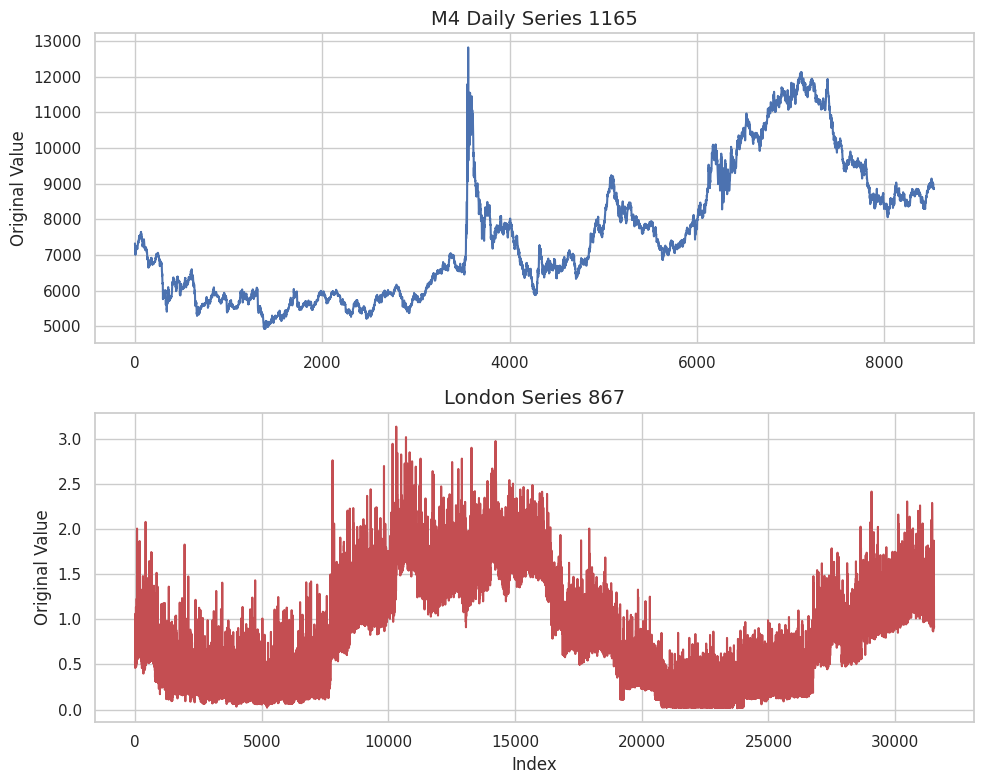

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a figure with two subplots, arranged vertically
# The sharex=True argument ensures both plots share the same x-axis for easier comparison
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=False)

# Plot the first series on the top subplot (ax1)
ax1.plot(m4_row,color='b')
ax1.set_title('M4 Daily Series 1165', fontsize=14)
ax1.set_ylabel('Original Value', fontsize=12)
ax1.grid(True)

# Plot the second series on the bottom subplot (ax2)
ax2.plot(london_row, color='r')
ax2.set_title('London Series 867', fontsize=14)
ax2.set_xlabel('Index', fontsize=12)
ax2.set_ylabel('Original Value', fontsize=12)
ax2.grid(True)

# Adjust the layout to prevent titles and labels from overlapping
plt.tight_layout()
plt.savefig(f'compare_series.png')

In [10]:
np.std(london_row)/london_row.mean()

0.7453920833916919

In [11]:
np.std(m4_row)/m4_row.mean()

0.24499482650728316

In [18]:
np.std(smoothed_series)/smoothed_series.mean()

0.700643633836233

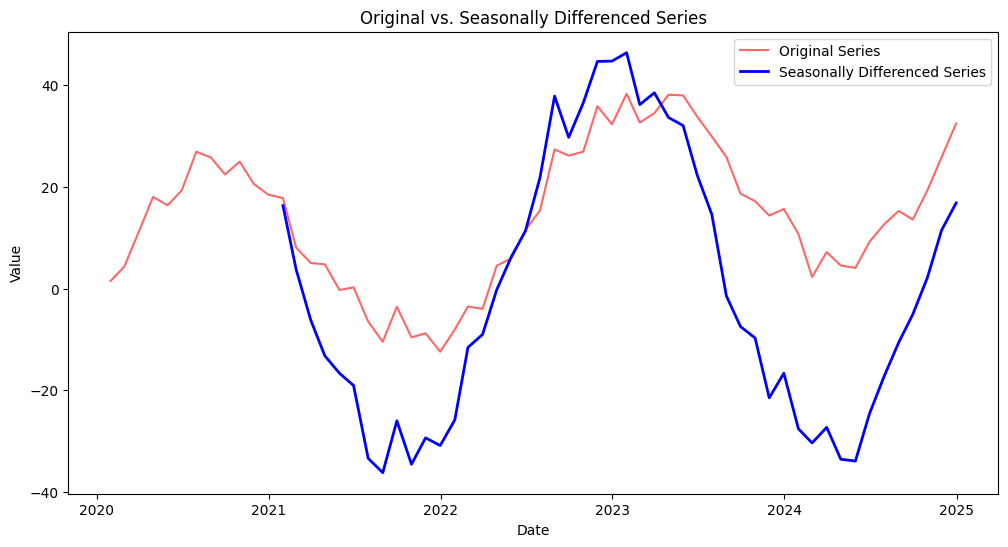

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Re-using the same series from above
np.random.seed(42)
index = pd.date_range('2020-01', periods=60, freq='M')
seasonal_component = 20 * np.sin(np.linspace(0, 4 * np.pi, 60))
trend_component = np.arange(60) * 0.5
noise = np.random.normal(0, 3, 60)
series = pd.Series(seasonal_component + trend_component + noise, index=index)

# Apply seasonal differencing with a period of 12 (for yearly seasonality)
seasonal_differenced_series = series.diff(periods=12)

# Plot both the original and differenced series for comparison
plt.figure(figsize=(12, 6))
plt.plot(series, label='Original Series', color='red', alpha=0.6)
plt.plot(seasonal_differenced_series, label='Seasonally Differenced Series', color='blue', linewidth=2)
plt.title('Original vs. Seasonally Differenced Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()